## Imports

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA

train = pd.read_csv('../data/training_1.csv')
train2 = pd.read_csv('../data/training_2.csv')

## Fit the signal on the training_1 data

In [53]:
signal = "L_T7"

model = ARMA(train[signal], order=(2,4))
model_fit = model.fit()

## Custom ARMA using residuals

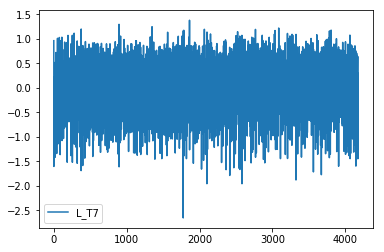

In [62]:
%matplotlib inline
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
        yhat += coef[i-1] * history[-i]
    return yhat

test = train2[signal]
ar_coef, ma_coef = model_fit.arparams, model_fit.maparams
resid = [x for x in model_fit.resid]
history = [x for x in train[signal]]
predictions = list()
for t in range(len(test)):
    yhat = predict(ar_coef, history) + predict(ma_coef, resid)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    resid.append(obs-yhat)
#     print('predicted=%f, expected=%f' % (yhat, obs))

res = np.subtract(train2[signal], predictions)
res = res - np.mean(res)
# plt.plot(predictions, label='pred')
# plt.plot(train2[signal], label='true')
plt.plot(res)
plt.legend()
plt.show()

## Custom ARMA using white noise

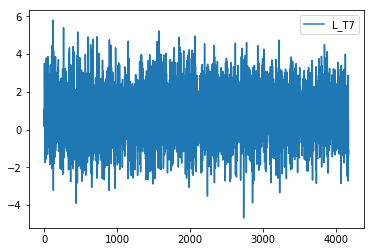

In [58]:
%matplotlib inline
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
        yhat += coef[i-1] * history[-i]
    return yhat

test = train2[signal]
ar_coef, ma_coef = model_fit.arparams, model_fit.maparams
# resid = [x for x in model_fit.resid]
noise = [np.random.rand() for x in range(0,len(ma_coef))]
history = [x for x in train[signal]]
predictions = list()
mu = np.mean(train[signal])
for t in range(len(test)):
    e = np.random.normal()
    yhat = predict(ar_coef, history) + predict(ma_coef, noise) + e
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    noise.append(e)
#     resid.append(obs-yhat)
#     print('predicted=%f, expected=%f' % (yhat, obs))

res = np.subtract(train2[signal], predictions)
# plt.plot(predictions, label='pred')
# plt.plot(train2[signal], label='true')
plt.plot(res)
plt.legend()
plt.show()

## Using the forecast() method

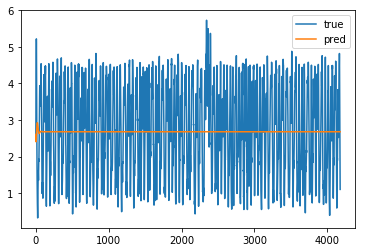

In [33]:
# pred = model_fit.predict(start=len(train[signal]), end=len(train[signal])+len(test[signal]))
pred = model_fit.forecast(steps=len(train2[signal]))
# plt.plot(train[signal][:len(train2[signal2])], label='train')
plt.plot(train2[signal], label='true')
plt.plot(pred[0], label='pred')
plt.legend()
plt.show()

## In-sample prediction (on training_1)

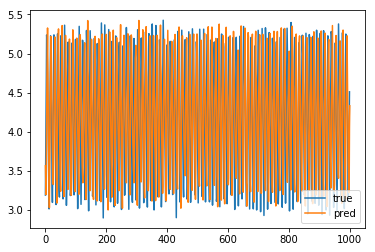

In [17]:
size = 1000

pred = model_fit.predict(start=len(train[signal])-size, end=len(train[signal]))
plt.plot(train[signal][:size], label='true')
plt.plot(pred.reset_index(drop=True), label='pred')
plt.legend()
plt.show()